# Exploratory Data Analysis

In [1]:
# Loading Data and Dependencies

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

train = pd.read_csv('Processed_DataSets/Training Data for EDA.csv',encoding='ISO-8859-1',low_memory=False,index_col=0)
print(train.columns)
train.head(4)

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition',
       'payment_status', 'compliance_detail', 'compliance', 'violator_type',
       'count_violation', 'responsible_by', 'fine_waived', 'ticket_time',
       'month_bin', 'address', 'lat', 'lon', 'fine_amount_N', 'admin_fee_N',
       'state_fee_N', 'late_fee_N', 'discount_amount_N', 'clean_up_cost_N',
       'judgment_amount_N', 'payment_amount_N', 'balance_due_N',
       'len_violator_N', 'len_description_N'],
      dtype='object')


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,admin_fee_N,state_fee_N,late_fee_N,discount_amount_N,clean_up_cost_N,judgment_amount_N,payment_amount_N,balance_due_N,len_violator_N,len_description_N
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,0.0,0.0,0.125,0.0,0.0,0.138259,0.000000,1.403421,0.000000,0.723982
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,0.0,0.0,0.375,0.0,0.0,0.387579,0.353581,1.326291,1.538462,0.678733
2,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,2755.0,E. 17TH,LOG BEACH,CA,...,0.0,0.0,0.125,0.0,0.0,0.138259,0.000000,1.403421,0.897436,0.723982
3,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",8027.0,BRENTWOOD,476.0,Garfield,Clinton,MI,...,0.0,0.0,0.375,0.0,0.0,0.387579,0.000000,1.587860,0.000000,0.588235


# Continuous Feature Analysis:

## Looking at Type of Distribution With Histograms

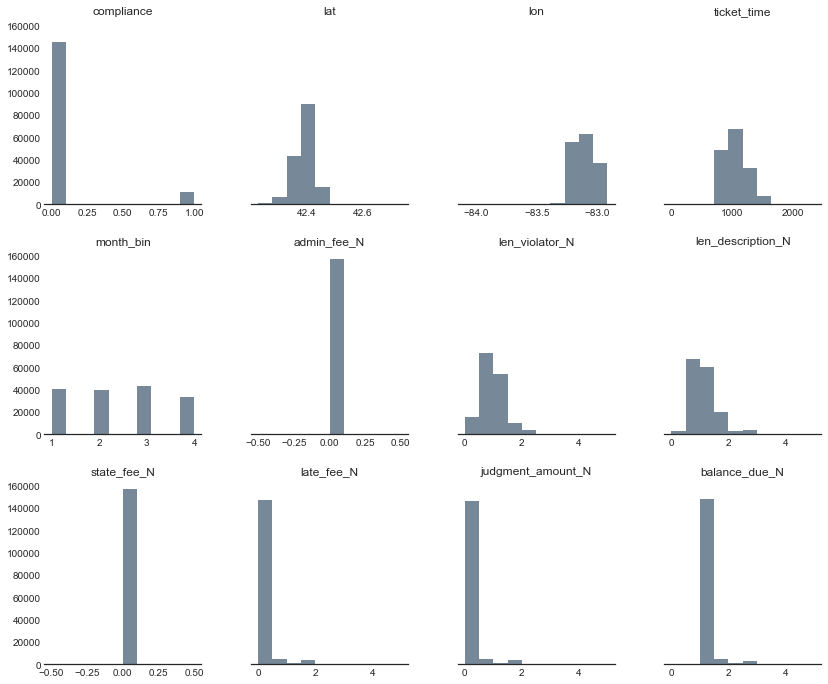

In [2]:
cont = train[['compliance','lat','lon','ticket_time',
    'month_bin','admin_fee_N','len_violator_N','len_description_N', 
    'state_fee_N','late_fee_N','judgment_amount_N','balance_due_N']].copy()
col = cont.columns
count = 0
canv , axs = plt.subplots(3,4,sharex=False, sharey=True)
canv.set_size_inches(12,10)
canv.tight_layout(pad=3)

for row in axs:
    for axis in row:
        plt.sca(axis)
        plt.hist(cont[col[count]],color='lightslategrey')
        plt.title(col[count])
        for key,spine in plt.gca().spines.items():
            if key == 'bottom':
                continue
            spine.set_visible(False)
        plt.tick_params(axis='both', which='both',length=0)
        count +=1 

In [3]:
#Most Normalized Feature has Normal DistriBution which does not require more scaling

## Heatmap for Continuous Variable Co-Relation

In [4]:
cor = train[['compliance','fine_amount_N', 'admin_fee_N', 'state_fee_N', 'late_fee_N','discount_amount_N',
    'clean_up_cost_N', 'judgment_amount_N', 'payment_amount_N','fine_waived','count_violation', 
    'balance_due_N','len_violator_N','len_description_N','lat','lon','violation_street_number','ticket_time',
    'month_bin']].corr()


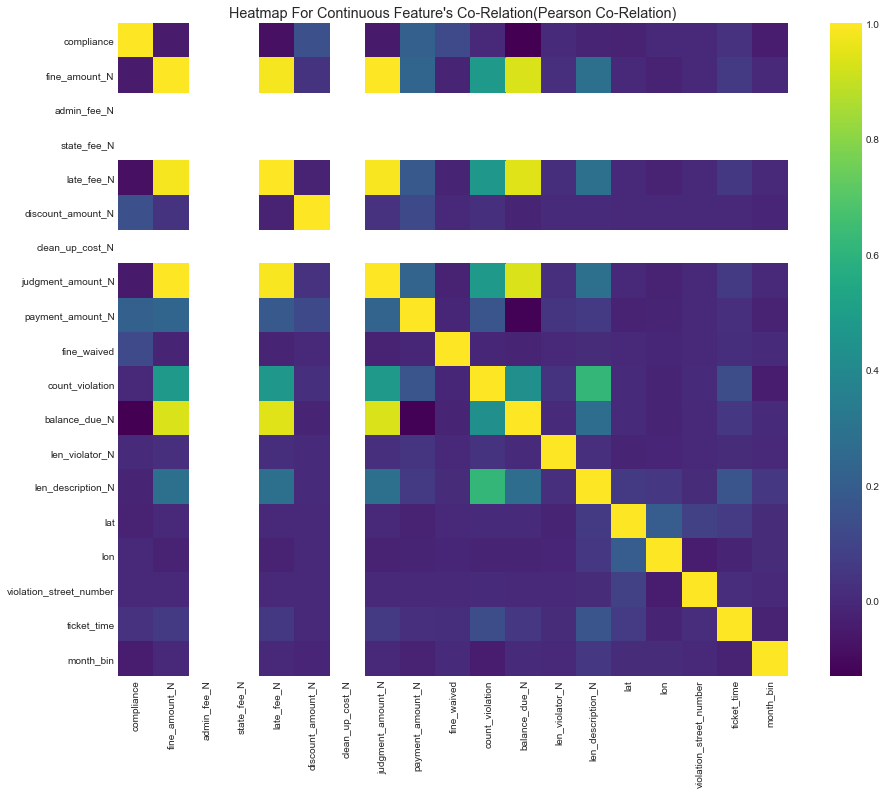

In [5]:
plt.figure(figsize=(15,12))
axs=sns.heatmap(cor,cmap="viridis")
plt.title("Heatmap For Continuous Feature's Co-Relation(Pearson Co-Relation)",size='x-large');

In [6]:
# As, we can see some features bare no relationship with compliance hence dropping those features
train.drop(['admin_fee_N','clean_up_cost_N','state_fee_N'],axis=1,inplace=True)

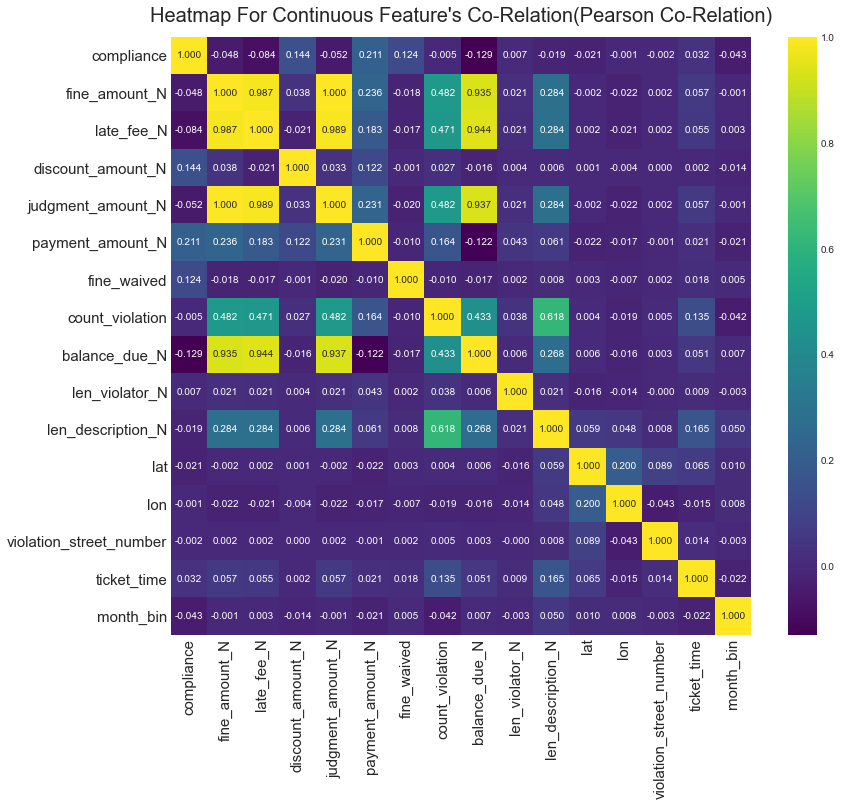

In [7]:
cor = train[['compliance','fine_amount_N','late_fee_N','discount_amount_N',
    'judgment_amount_N', 'payment_amount_N','fine_waived','count_violation', 
    'balance_due_N','len_violator_N','len_description_N','lat','lon','violation_street_number','ticket_time',
    'month_bin']].corr()

plt.figure(figsize=(13,11))

axs=sns.heatmap(cor,annot=True,cmap="viridis",fmt='.3f')
axs.set_xticklabels(axs.get_xmajorticklabels(), fontsize = 15)
axs.set_yticklabels(axs.get_ymajorticklabels(), fontsize = 15)
plt.title("Heatmap For Continuous Feature's Co-Relation(Pearson Co-Relation)",size=20,pad=15);

plt.savefig('Visualizations/Heatmap.png',bbox_inches='tight'); #Saving Visualization

In [8]:
#According to the HeatMap the most Co-related Features are 'fine_amount_N','late_fee_N','discount_amount_N',
#'judgment_amount_N', 'payment_amount_N','fine_waived','balance_due_N','ticket_time','month_bin'

## Using a simple  Extra Tree Classifier for extracting Feature Importance

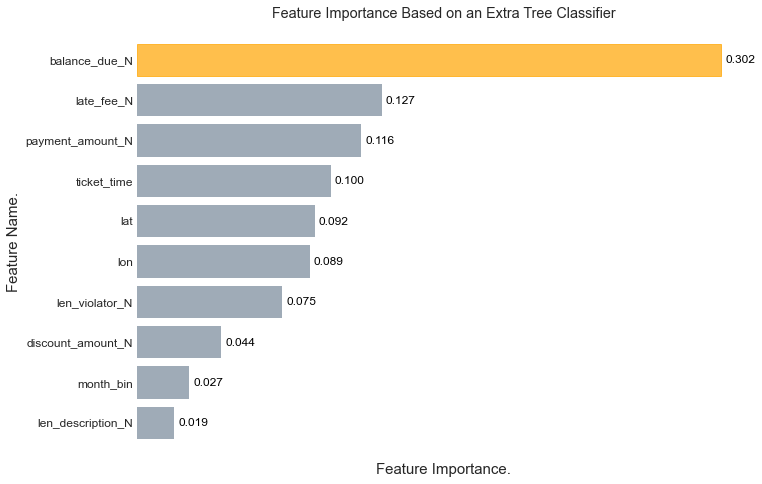

In [9]:
X = train[['compliance','fine_amount_N','late_fee_N','discount_amount_N',
    'judgment_amount_N', 'payment_amount_N','fine_waived','count_violation', 
    'balance_due_N','len_violator_N','len_description_N','lat','lon','ticket_time',
    'month_bin']].copy()

#Handling inf values

X.astype(np.float32)
X.replace([np.inf, -np.inf], np.nan,inplace=True)
X.dropna(inplace=True)

X_train = X.drop(['compliance'],axis=1) #Independent Variables

y = X.compliance #target column i.e compliance

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y)

#Using inbuilt class feature_importances of tree based classifiers
#Plot a graph of feature importances for better visualization

feat_imp=pd.DataFrame(model.feature_importances_,index=X_train.columns).reset_index()
feat_imp.columns=['feature','importance']
feat_imp = feat_imp.nlargest(10,columns='importance')

plt.figure(figsize=(11,8))

bars = plt.barh(np.arange(len(feat_imp.feature)),feat_imp['importance'].iloc[::-1],color='lightslategrey',alpha=0.7)
bars[-1].set_color('orange')

for bar,name,value in zip(bars,feat_imp['feature'].iloc[::-1].tolist(),feat_imp['importance'].iloc[::-1].tolist()):
    plt.text((bar.get_width()+0.002),(bar.get_y()+0.32),'{:.3f}'.format(value),color='k',fontsize=12)

plt.yticks(np.arange(len(feat_imp['feature'])),feat_imp['feature'].iloc[::-1],fontsize=12);
plt.gca().set_xticks([])
plt.tick_params(axis='both', which='both',length=0)

plt.xlabel('Feature Importance.',fontsize=15)
plt.ylabel('Feature Name.',fontsize=15)
plt.title('Feature Importance Based on an Extra Tree Classifier',size='x-large')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.savefig('Visualizations/FeatureSelection_FeatureImportance.png',bbox_inches='tight'); #Saving Visualization

In [10]:
#According to the Extra Tree Classifier the most important features are 'balanced_due_N','late_fee_N','discount_amount_N',
#''payment_amount_N','balance_due_N','len_violator_N','len_description_N','lat','lon','ticket_time',
#'month_bin'

## Making a Scatter Matrix for most important Continuous Features

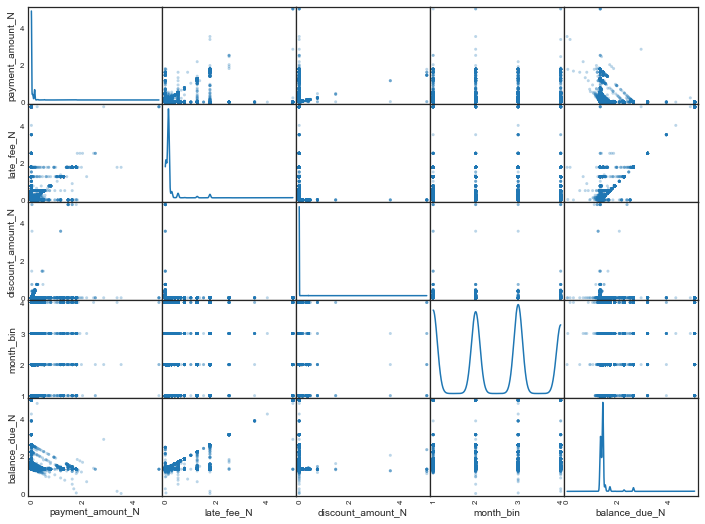

In [11]:
imp_cols = ['payment_amount_N','late_fee_N','discount_amount_N','month_bin','balance_due_N']
pd.plotting.scatter_matrix(train[imp_cols],alpha=0.3,figsize=(12,9),diagonal='kde');

In [12]:
#The Data is very sparse therefore we cannot extract much useful information 
#from the scatter matrix and hence we have to relly on tradition Statistical Analysis

## Univariate Selection : Chi Sq. Statistical Test

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train = X.drop(['compliance','lat','lon'],axis=1) #Independent Variables

y = X.compliance #target column i.e compliance

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Feature','Score']  #naming the dataframe columns
top10_feat = featureScores.nlargest(10,'Score').reset_index(drop=True)  #print 10 best features
top10_feat

,Feature,Score
0,ticket_time,5837.286042
1,discount_amount_N,4405.593307
2,payment_amount_N,2850.562993
3,fine_waived,2406.243941
4,late_fee_N,735.354241
5,judgment_amount_N,242.292350
6,fine_amount_N,226.870119
7,month_bin,143.226735
8,balance_due_N,104.844754
9,len_description_N,12.554653


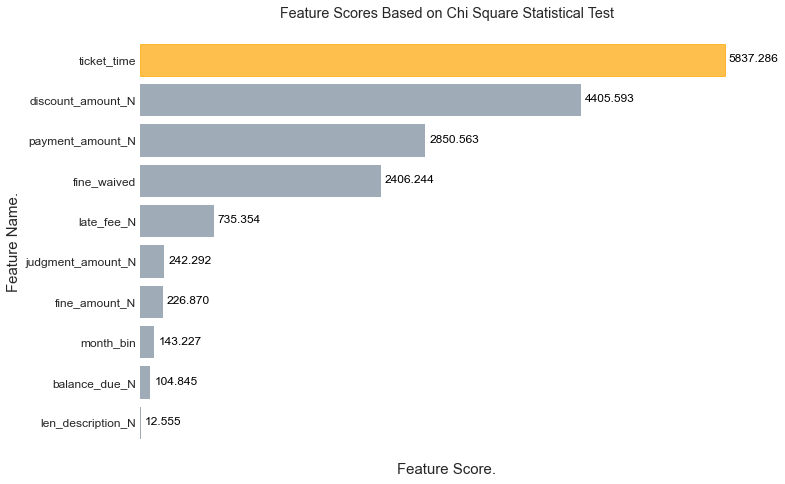

In [14]:
#Plotting Chi Square Test Results

plt.figure(figsize=(11,8))

bars = plt.barh(np.arange(len(top10_feat.Feature)),top10_feat['Score'].iloc[::-1],color='lightslategrey',alpha=0.7)
bars[-1].set_color('orange')

for bar,name,value in zip(bars,top10_feat['Feature'].iloc[::-1].tolist(),top10_feat['Score'].iloc[::-1].tolist()):
    plt.text((bar.get_width()+40),(bar.get_y()+0.35),'{:.3f}'.format(value),color='k',fontsize=12)

plt.yticks(np.arange(len(top10_feat['Feature'])),top10_feat['Feature'].iloc[::-1],fontsize=12);
plt.gca().set_xticks([])
plt.tick_params(axis='both', which='both',length=0)

plt.xlabel('Feature Score.',fontsize=15)
plt.ylabel('Feature Name.',fontsize=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.title('Feature Scores Based on Chi Square Statistical Test',size='x-large');

plt.savefig('Visualizations/FeatureSelection_UnivariateSelection.png',bbox_inches='tight'); #Saving Visualization

# Categorical Feature Analysis

In [15]:
print(train.columns)
train.head(3)

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition',
       'payment_status', 'compliance_detail', 'compliance', 'violator_type',
       'count_violation', 'responsible_by', 'fine_waived', 'ticket_time',
       'month_bin', 'address', 'lat', 'lon', 'fine_amount_N', 'late_fee_N',
       'discount_amount_N', 'judgment_amount_N', 'payment_amount_N',
       'balance_due_N', 'len_violator_N', 'len_description_N'],
      dtype='object')


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,lat,lon,fine_amount_N,late_fee_N,discount_amount_N,judgment_amount_N,payment_amount_N,balance_due_N,len_violator_N,len_description_N
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,42.388761,-83.131253,0.125,0.125,0.0,0.138259,0.000000,1.403421,0.000000,0.723982
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,42.333230,-83.136202,0.375,0.375,0.0,0.387579,0.353581,1.326291,1.538462,0.678733
2,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,2755.0,E. 17TH,LOG BEACH,CA,...,42.344441,-83.127903,0.125,0.125,0.0,0.138259,0.000000,1.403421,0.897436,0.723982


In [16]:
#Taking Categorical Features

cat = train[['compliance','agency_name','inspector_name','violator_name','violation_street_name',
            'city','state','country','violation_code','responsible_by','fine_waived',
             'mailing_address_str_name','violator_type','address']].copy()

hist = np.array([['feature','unique_entries']])
for col in cat.columns.tolist():
    hist = np.append(hist,[[col,len(cat[col].unique())]],axis=0)

hist = pd.DataFrame(data=hist[1:],columns=hist[0])
hist['unique_entries'] = hist.unique_entries.astype(np.float32)
hist = hist.nlargest(len(hist),columns='unique_entries')
hist.reset_index(drop=True)

,feature,unique_entries
0,violator_name,83406.0
1,mailing_address_str_name,26831.0
2,city,3942.0
3,violation_street_name,1711.0
4,address,1711.0
5,violation_code,188.0
6,inspector_name,159.0
7,state,57.0
8,agency_name,5.0
9,country,3.0


In [17]:
#Dropping features with high categories to ensure smoother Dummies

cat.drop(hist.feature.tolist()[:8],axis=1,inplace=True)
train.drop(hist.feature.tolist()[:8],axis=1,inplace=True)

#Checking again
hist = np.array([['feature','unique_entries']])
for col in cat.columns.tolist():
    hist = np.append(hist,[[col,len(cat[col].unique())]],axis=0)

hist = pd.DataFrame(data=hist[1:],columns=hist[0])
hist['unique_entries'] = hist.unique_entries.astype(np.float32)
hist = hist.nlargest(len(hist),columns='unique_entries')
hist.reset_index(drop=True)

,feature,unique_entries
0,agency_name,5.0
1,country,3.0
2,responsible_by,3.0
3,compliance,2.0
4,fine_waived,2.0
5,violator_type,2.0


## Plotting Histograms to find different Distributions

In [18]:
cat.head(3)

,compliance,agency_name,country,responsible_by,fine_waived,violator_type
0,0.0,"Buildings, Safety Engineering & Env Department",USA,Default,0,Agency
1,1.0,"Buildings, Safety Engineering & Env Department",USA,Determination,0,Agency
2,0.0,"Buildings, Safety Engineering & Env Department",USA,Default,0,Person


In [19]:
#Making a Mapper data structure for hot key encoding
mapper = [{},{},{},{}]
for cn,dit in zip(['agency_name','country','responsible_by','violator_type'],mapper):
    cnt = 0
    for val in cat[cn].unique():
        dit[val] = cnt
        cnt +=1
        
#Hot key encoding
for cn,dit in zip(['agency_name','country','responsible_by','violator_type'],mapper):
    cat[cn] = cat[cn].apply(lambda x : dit[x])

In [20]:
for cn, dit in zip(['agency_name','country','responsible_by','violator_type'],mapper):
    print("Mapping for '{}'\n".format(cn))
    cnt = 1
    for k,v in dit.items():
        print("{}. {} Mapped to --> '{}'".format(cnt,k,v))
        cnt += 1
    print('\n')

Mapping for 'agency_name'

1. Buildings, Safety Engineering & Env Department Mapped to --> '0'
2. Health Department Mapped to --> '1'
3. Department of Public Works Mapped to --> '2'
4. Detroit Police Department Mapped to --> '3'
5. Neighborhood City Halls Mapped to --> '4'


Mapping for 'country'

1. USA Mapped to --> '0'
2. Cana Mapped to --> '1'
3. Aust Mapped to --> '2'


Mapping for 'responsible_by'

1. Default Mapped to --> '0'
2. Determination Mapped to --> '1'
3. Admission Mapped to --> '2'


Mapping for 'violator_type'

1. Agency Mapped to --> '0'
2. Person Mapped to --> '1'




In [21]:
cat.head(3)

,compliance,agency_name,country,responsible_by,fine_waived,violator_type
0,0.0,0,0,0,0,0
1,1.0,0,0,1,0,0
2,0.0,0,0,0,0,1


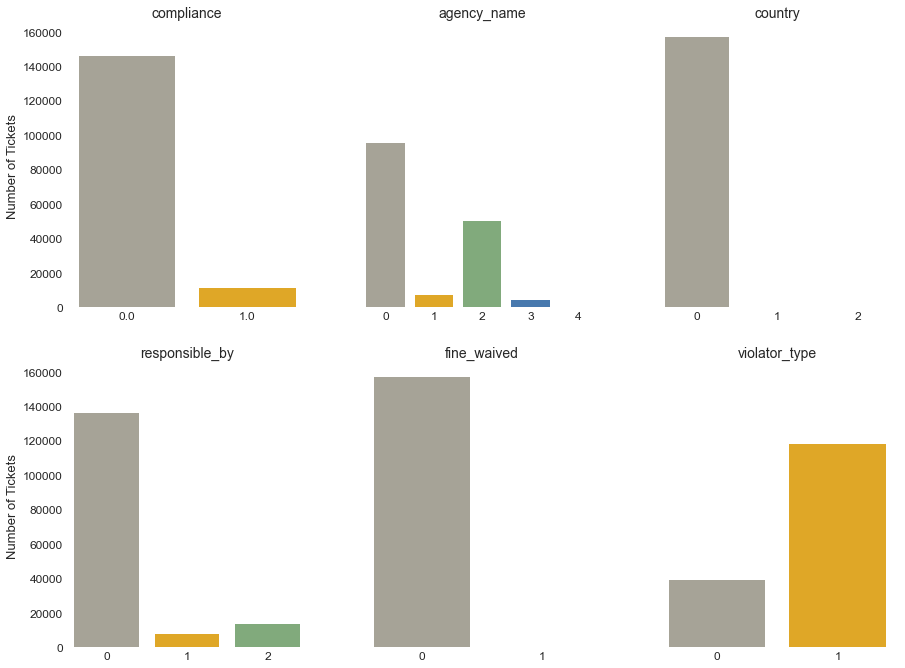

In [22]:
#Plotting Histogram

col = cat.columns.tolist()
count = 0
canv , axes = plt.subplots(2,3,sharex=False, sharey=True)
canv.set_size_inches(13,10)
canv.tight_layout(pad=4)
colors = ["greyish","amber","faded green","windows blue","dusty purple"]

for row in axes:
    for axis in row:
        plt.sca(axis)
        axs = sns.barplot(cat[col[count]].value_counts().index,cat[col[count]].value_counts()
                          ,palette=sns.xkcd_palette(colors))
        axs.set_title(col[count],fontsize=14)
        for key,spine in plt.gca().spines.items():
            spine.set_visible(False)
        plt.tick_params(axis='both', which='both',length=0,labelsize=12)
        plt.ylabel('')
        count +=1

#Tuning
plt.sca(axes[0][0])
plt.ylabel('Number of Tickets',fontsize=13)
plt.sca(axes[1][0])
plt.ylabel('Number of Tickets',fontsize=13)
plt.savefig('Visualizations/Categorical_Distribution.png',bbox_inches='tight')

# Plotting Compliance along with each Categorical Feature Value 

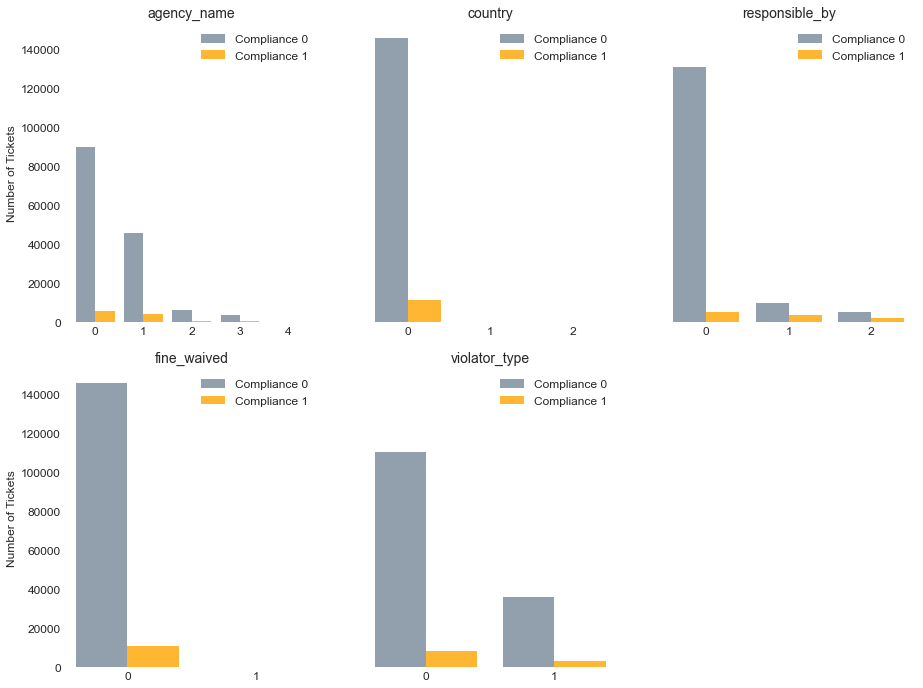

In [23]:
col = cat.columns.tolist()[1:]
count = 0
canv , axs = plt.subplots(2,3,sharex=False, sharey=True)
canv.set_size_inches(13,10)
canv.tight_layout(pad=3)

for row in axs:
    for axis in row:
        try:
            if col[count] != 'agency_name':
                pt = pd.pivot_table(cat,index='compliance',columns=col[count],values='agency_name',aggfunc ='count').fillna(0)
            else:
                pt = pd.pivot_table(cat,index ='compliance',columns=col[count],values ='country',aggfunc ='count').fillna(0)
        except:
            continue
        
        plt.sca(axis)
        plt.title(col[count],fontsize=14)
        
        plt.bar(cat[col[count]].value_counts().index-0.4,np.array(pt.query('compliance==["0.0"]'))[0],
                width=0.4,align='center',label='Compliance 0',color='lightslategrey',alpha=0.8)
        
        plt.bar(cat[col[count]].value_counts().index,np.array(pt.query('compliance==["1.0"]'))[0],
                width=0.4,align='center',label='Compliance 1',color='orange',alpha=0.8)
        
        plt.legend(fontsize=12)
        plt.xticks(cat[col[count]].value_counts().index-0.2,cat[col[count]].value_counts().index)
        
        for key,spine in plt.gca().spines.items():
            spine.set_visible(False)
        
        plt.tick_params(axis='both', which='both',length=0,labelsize=12)
        count+=1
        
#Tuning
plt.sca(axs[0][0])
plt.ylabel('Number of Tickets',fontsize=12)
plt.sca(axs[1][0])
plt.ylabel('Number of Tickets',fontsize=12)
plt.sca(axs[-1][-1])
for key,spine in plt.gca().spines.items():
        spine.set_visible(False)
plt.tick_params(axis='both', which='both',length=0, labelbottom=False)
plt.savefig('Visualizations/Compliance_Dist_Featue.png',bbox_inches='tight')

# Based on the Analysis, Selecting Features and Making a Final Training DataSet

In [24]:
#Dropping all the non-critical columns along with the unwanted columns as found from the analysis
#Dropping all the columns that can cause Data Leakage

train.drop(['violation_street_number','mailing_address_str_number','zip_code','hearing_date','violation_description',
       'disposition','payment_status','compliance_detail','lat','lon','payment_amount_N',
       'balance_due_N','ticket_issued_date'],axis=1,inplace=True)

In [25]:
train.head(3)

,ticket_id,agency_name,country,compliance,violator_type,count_violation,responsible_by,fine_waived,ticket_time,month_bin,fine_amount_N,late_fee_N,discount_amount_N,judgment_amount_N,len_violator_N,len_description_N
0,22056,"Buildings, Safety Engineering & Env Department",USA,0.0,Agency,1,Default,0,1140,1,0.125,0.125,0.0,0.138259,0.000000,0.723982
1,27586,"Buildings, Safety Engineering & Env Department",USA,1.0,Agency,1,Determination,0,1230,2,0.375,0.375,0.0,0.387579,1.538462,0.678733
2,22046,"Buildings, Safety Engineering & Env Department",USA,0.0,Person,1,Default,0,1150,2,0.125,0.125,0.0,0.138259,0.897436,0.723982


## Geting dummy Variables

In [26]:
train['fine_waived'] = train['fine_waived'].astype(object)

for cl in ['compliance','count_violation','ticket_time','month_bin','fine_amount_N','late_fee_N','discount_amount_N',
          'judgment_amount_N','len_violator_N','len_description_N']:
    train[cl] = train[cl].astype(np.float32)

train.replace([np.inf, -np.inf], np.nan)
train.dropna(inplace=True)
train = pd.get_dummies(train)

In [27]:
train.dtypes

ticket_id                                                       int64
compliance                                                    float32
count_violation                                               float32
ticket_time                                                   float32
month_bin                                                     float32
fine_amount_N                                                 float32
late_fee_N                                                    float32
discount_amount_N                                             float32
judgment_amount_N                                             float32
len_violator_N                                                float32
len_description_N                                             float32
agency_name_Buildings, Safety Engineering & Env Department      uint8
agency_name_Department of Public Works                          uint8
agency_name_Detroit Police Department                           uint8
agency_name_Health D

In [28]:
train.to_csv('Processed_DataSets/Final_Train.csv')